In [42]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
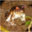

In [5]:
x_train[0]

In [20]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train.reshape(-1,)
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[9]

'truck'

In [15]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[int(y[index])])

<ipython-input-15-5c032c876e59>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


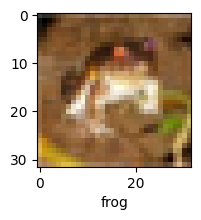

In [16]:
plot_sample(x_train,y_train,0)

<ipython-input-15-5c032c876e59>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


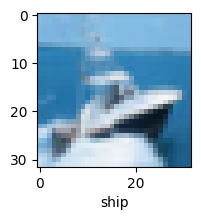

In [17]:
plot_sample(x_train,y_train,8)

<ipython-input-15-5c032c876e59>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


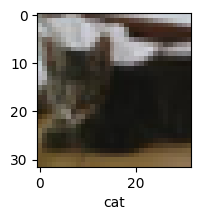

In [18]:
plot_sample(x_train,y_train,9)

In [19]:
#normalise
x_train=x_train/255
x_test=x_test/255

In [23]:
#build an ann model
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.2308 - loss: 2.1087
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 99ms/step - accuracy: 0.4159 - loss: 1.6378
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 99ms/step - accuracy: 0.4969 - loss: 1.4145


In [25]:
y_test.shape

(10000, 1)

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [24]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.5408 - loss: 1.3034


[1.3115460872650146, 0.5339000225067139]

<ipython-input-15-5c032c876e59>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


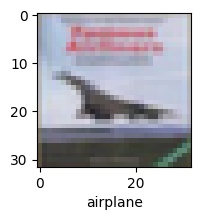

In [35]:
plot_sample(x_test,y_test,3)

In [36]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


array([[8.6093284e-03, 4.3580318e-03, 7.4674711e-02, 4.6934852e-01,
        3.2621168e-02, 2.9012880e-01, 6.6385359e-02, 2.6639517e-02,
        2.1989275e-02, 5.2452944e-03],
       [2.9111522e-01, 2.7961150e-01, 4.8314422e-04, 3.5833011e-05,
        5.6440802e-04, 1.0838410e-05, 2.4207266e-05, 7.5804172e-05,
        3.3811125e-01, 8.9967802e-02],
       [1.9078134e-01, 2.1790157e-01, 5.3242887e-03, 1.9242000e-03,
        3.9816052e-03, 9.2901173e-04, 5.1375775e-04, 2.1054586e-03,
        4.7993582e-01, 9.6602865e-02],
       [5.1289737e-01, 4.3717399e-02, 5.4815323e-03, 6.3505798e-04,
        4.1042352e-03, 1.0931713e-04, 5.1729061e-04, 1.2799801e-03,
        4.2008814e-01, 1.1169776e-02],
       [2.1106189e-03, 1.0725452e-03, 1.7097473e-01, 9.4026893e-02,
        4.5278138e-01, 6.5840833e-02, 1.7918169e-01, 3.1372868e-02,
        1.2524779e-03, 1.3859225e-03]], dtype=float32)

In [37]:
y_class=[np.argmax(elem) for elem in y_pred]
y_class[:5]

[3, 8, 8, 0, 4]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [39]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [41]:
classes[y_class[3]]

'airplane'

In [44]:
print("classification report:",classification_report(y_test,y_class))

classification report:               precision    recall  f1-score   support

           0       0.55      0.67      0.61      1000
           1       0.67      0.66      0.66      1000
           2       0.47      0.26      0.34      1000
           3       0.55      0.15      0.24      1000
           4       0.40      0.56      0.47      1000
           5       0.48      0.49      0.48      1000
           6       0.56      0.67      0.61      1000
           7       0.47      0.70      0.57      1000
           8       0.66      0.61      0.63      1000
           9       0.60      0.57      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.52     10000
weighted avg       0.54      0.53      0.52     10000

